In [1]:
import pandas as pd
import numpy as np

from IPython.display import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [2]:
df_train = pd.read_csv('sf04classification/train.csv', encoding='utf8', index_col='_id')
df_test = pd.read_csv('sf04classification/test.csv', encoding='utf8', index_col='_id')
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'
df = df_test.append(df_train).reset_index(drop=True)

In [3]:
#train.info() #full, got objects

In [4]:
#test.info() #no tgt column. full, got objects

In [5]:
def preproc_data(df_input):
    df_output = df_input.copy()

    # category code
    df_output = pd.get_dummies(df_output, columns=['job', 'marital', 
                                                   'education', 'default', 
                                                   'housing', 'loan', 
                                                   'contact', 'month', 
                                                   'day_of_week', 
                                                   'poutcome'])
        
    return df_output

In [6]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

df_test_preproc = df_test_preproc.drop(['target'], axis=1)

In [21]:
X = df_train_preproc.drop(['target'], axis=1)
X_test = df_test_preproc

y = df_train_preproc['target']
y_test = df_test_preproc

In [19]:
print(X.shape, X_test.shape, y.shape, y_test.shape)

(24712, 63) (16476, 63) (24712,) (16476, 63)


In [23]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train_, y_train_)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_, y_train_)

lr = LogisticRegression()
lr.fit(X_train_, y_train_)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_, y_train_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

Ниже показан самый главный классификатор (nr.employed)

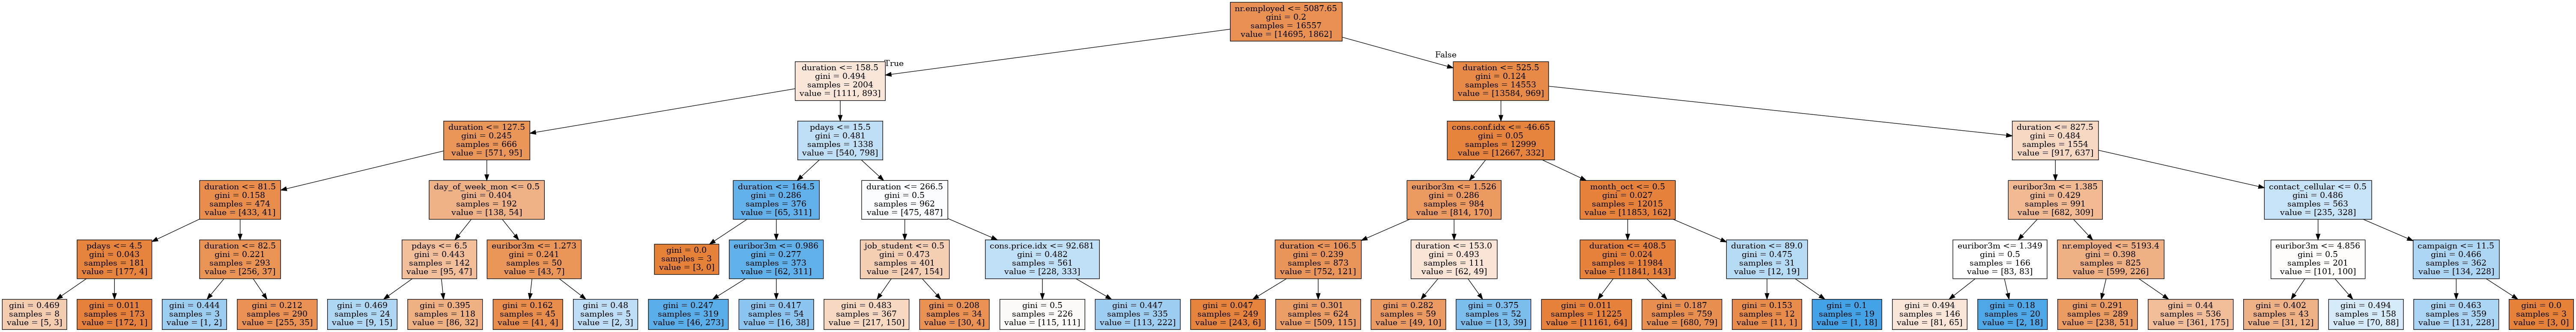

In [25]:
dot_data = StringIO()
export_graphviz(dtc, feature_names=X.columns, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [26]:
print(
    "DTC: ", roc_auc_score(y_test_, dtc.predict_proba(X_test_)[:,1]),
    "\nKNN: ", roc_auc_score(y_test_, knn.predict_proba(X_test_)[:,1]),
    "\nLR: ", roc_auc_score(y_test_, lr.predict_proba(X_test_)[:,1]),
    "\nRFC: ", roc_auc_score(y_test_, rfc.predict_proba(X_test_)[:,1])

)

DTC:  0.9202517289073305 
KNN:  0.7056237150013084 
LR:  0.9323285110836979 
RFC:  0.9056951142013383


In [27]:
dtc_real = DecisionTreeClassifier()
dtc_real.fit(X, y)
dtc_real_predict_proba = dtc_real.predict_proba(X_test)


knn_real = KNeighborsClassifier()
knn_real.fit(X, y)
knn_real_predict_proba = knn_real.predict_proba(X_test)


lr_real = LogisticRegression()
lr_real.fit(X, y)
lr_real_predict_proba = lr_real.predict_proba(X_test)


rfc_real = DecisionTreeClassifier()
rfc_real.fit(X, y)
rfc_real_predict_proba = rfc_real.predict_proba(X_test)

In [28]:
print(
    "DTC Real: ", roc_auc_score(y_test, dtc_real_predict_proba[:,1]),
    "\nKNN Real: ", roc_auc_score(y_test, knn_real_predict_proba[:,1]),
    "\nLR Real: ", roc_auc_score(y_test, lr_real_predict_proba[:,1]),
    "\nRFC Real: ", roc_auc_score(y_test, rf_real_predict_proba[:,1])
)

ValueError: continuous-multioutput format is not supported